In [ ]:
import librosa, librosa.display
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from PIL import Image
import random


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!kaggle datasets download -d andradaolteanu/gtzan-dataset-music-genre-classification -p 'drive/My Drive'


Dataset URL: https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification
License(s): other
gtzan-dataset-music-genre-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


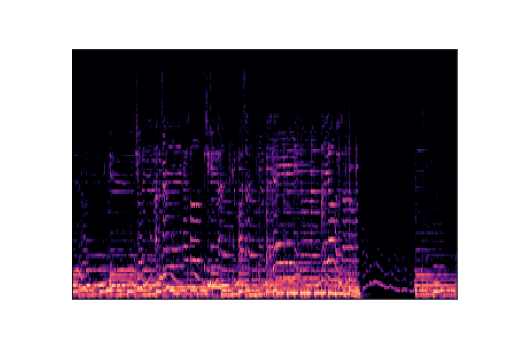

In [ ]:
images_path = 'drive/My Drive/gtzan_dataset/Data/images_original/rock/rock00098.png'

import matplotlib.image as mpimg

img = mpimg.imread(images_path)
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

In [ ]:
def load_images_from_folder(folder):
    images = []
    labels = []
    label = 0

    for subfolder in sorted(os.listdir(folder)):
        subfolder_path = os.path.join(folder, subfolder)

        if os.path.isdir(subfolder_path):

            for filename in sorted(os.listdir(subfolder_path)):
                img = Image.open(os.path.join(subfolder_path, filename))
                if img is not None:
                    images.append(np.array(img))
                    labels.append(label)

            label += 1

    return np.array(images), np.array(labels)


In [ ]:
images_dir = 'drive/My Drive/gtzan_dataset/Data/images_original'

images, labels = load_images_from_folder(images_dir)

In [ ]:
X = images.reshape(len(images),-1)

y = labels
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()

nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)

accuracy = nb_classifier.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.245


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

Random Forest Accuracy: 0.415


In [ ]:
'''import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Assuming X_train, X_test, y_train, y_test are already loaded and preprocessed

# Reshape the images to 4D tensors (batch_size, height, width, channels)
X_train = X_train.reshape(-1, 288, 432, 4)
X_test = X_test.reshape(-1, 288, 432, 4)

# Convert labels to one-hot encoding
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(288, 432, 4)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_one_hot, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test_one_hot)
print("Test Accuracy:", test_accuracy)
'''

'import numpy as np\nfrom tensorflow.keras.models import Sequential\nfrom tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense\nfrom tensorflow.keras.utils import to_categorical\n\n# Assuming X_train, X_test, y_train, y_test are already loaded and preprocessed\n\n# Reshape the images to 4D tensors (batch_size, height, width, channels)\nX_train = X_train.reshape(-1, 288, 432, 4)\nX_test = X_test.reshape(-1, 288, 432, 4)\n\n# Convert labels to one-hot encoding\ny_train_one_hot = to_categorical(y_train)\ny_test_one_hot = to_categorical(y_test)\n\n# Define the CNN model\nmodel = Sequential([\n    Conv2D(32, (3, 3), activation=\'relu\', input_shape=(288, 432, 4)),\n    MaxPooling2D((2, 2)),\n    Conv2D(64, (3, 3), activation=\'relu\'),\n    MaxPooling2D((2, 2)),\n    Conv2D(64, (3, 3), activation=\'relu\'),\n    Flatten(),\n    Dense(64, activation=\'relu\'),\n    Dense(10, activation=\'softmax\')\n])\n\n# Compile the model\nmodel.compile(optimizer=\'adam\',\n              lo

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

xgb_classifier = xgb.XGBClassifier()

xgb_classifier.fit(X_train, y_train)

y_pred_xgb = xgb_classifier.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", accuracy_xgb)


In [ ]:
import numpy as np
import xgboost as xgb
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train_flattened)
X_test_pca = pca.transform(X_test_flattened)

xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train_pca, y_train)
y_pred_xgb = xgb_classifier.predict(X_test_pca)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy (with PCA):", accuracy_xgb)


XGBoost Accuracy (with PCA): 0.5


In [ ]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

pca = PCA(n_components=100)
pca.fit(X_train)

accuracies = []

for n_components in range(1, 101):

    X_train_pca = pca.transform(X_train)[:, :n_components]
    X_test_pca = pca.transform(X_test)[:, :n_components]

    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

    rf_classifier.fit(X_train_pca, y_train)

    y_pred_rf_pca = rf_classifier.predict(X_test_pca)

    accuracy_rf_pca = accuracy_score(y_test, y_pred_rf_pca)
    accuracies.append(accuracy_rf_pca)

plt.plot(range(1, 101), accuracies, marker='o')
plt.title('Accuracy vs. Number of Components for PCA')
plt.xlabel('Number of Components')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


KeyboardInterrupt: 

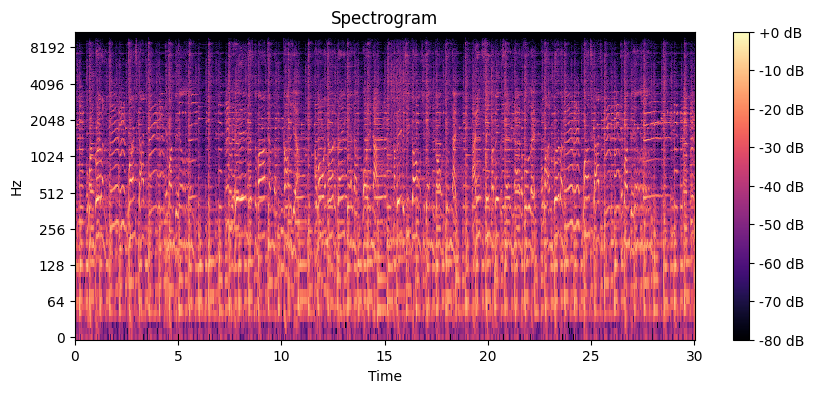

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

audio_path = 'drive/My Drive/gtzan_dataset/Data/genres_original/blues/blues.00000.wav'

y, sr = librosa.load(audio_path)

D = librosa.stft(y)

plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(abs(D), ref=np.max), sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()


In [ ]:
interval_length = 5

images_intervals = []
labels_intervals = []

for i in range(len(images)):
    img = images[i]
    label = labels[i]
    num_intervals = img.shape[1] // (interval_length)
    print(num_intervals)
    for j in range(num_intervals):
        start_col = j * interval_length
        end_col = (j + 1) * interval_length
        interval_img = img[:, start_col:end_col, :]
        images_intervals.append(interval_img)
        labels_intervals.append(label)



X = np.array(images_intervals).reshape(len(images_intervals), -1)
y = np.array(labels_intervals)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

n_components = 75

pca = PCA(n_components=n_components)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

rf_classifier_pca = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier_pca.fit(X_train_pca, y_train)

y_pred_rf_pca = rf_classifier_pca.predict(X_test_pca)

accuracy_rf_pca = accuracy_score(y_test, y_pred_rf_pca)
print("Random Forest Accuracy with PCA:", accuracy_rf_pca)


Random Forest Accuracy with PCA: 0.4550427748355933


In [ ]:
import os
import librosa
import math
import wave
from pydub import AudioSegment

root_folder = 'drive/My Drive/gtzan_dataset/Data/genres_original'

output_folder = 'drive/My Drive/gtzan_dataset/Data/genres_augmented'

segment_duration = 5

def is_wav_corrupted(wav_file_path):
    try:

        with wave.open(wav_file_path, 'r') as wf:
            wf.readframes(10)
        return False
    except Exception as e:
        print(f"Error reading WAV file '{wav_file_path}': {e}")
        return True

for genre_folder in os.listdir(root_folder):
    genre_folder_path = os.path.join(root_folder, genre_folder)

    if os.path.isdir(genre_folder_path):
        output_genre_folder_path = os.path.join(output_folder, genre_folder)
        os.makedirs(output_genre_folder_path, exist_ok=True)

        for wav_file in os.listdir(genre_folder_path):
            if wav_file.endswith('.wav'):
                wav_file_path = os.path.join(genre_folder_path, wav_file)

                if not is_wav_corrupted(wav_file_path):

                    audio = AudioSegment.from_file(wav_file_path)

                    total_segments = math.ceil(len(audio) / (segment_duration * 1000))

                    for i in range(total_segments):
                        start_time = i * segment_duration * 1000
                        end_time = (i + 1) * segment_duration * 1000
                        segment = audio[start_time:end_time]

                        segment_output_path = os.path.join(output_genre_folder_path, f"{wav_file[:-4]}_{i}.wav")
                        segment.export(segment_output_path, format='wav')
                else:
                    print(f"Skipping processing of corrupted WAV file '{wav_file_path}'")


Error reading WAV file 'drive/My Drive/gtzan_dataset/Data/genres_original/jazz/jazz.00054.wav': file does not start with RIFF id
Skipping processing of corrupted WAV file 'drive/My Drive/gtzan_dataset/Data/genres_original/jazz/jazz.00054.wav'


In [ ]:
import os
import librosa
import matplotlib.pyplot as plt

folder_path = 'drive/My Drive/gtzan_dataset/Data/genres_augmented'

outpath = 'drive/My Drive/gtzan_dataset/Data/images_augmented'

for genre in os.listdir(folder_path):
    genre_folder = os.path.join(folder_path, genre)

    if os.path.isdir(genre_folder):

        out_genre_folder = os.path.join(outpath, genre)
        os.makedirs(out_genre_folder, exist_ok=True)

        for wav_file in os.listdir(genre_folder):
            if wav_file.endswith('.wav'):
                wav_file_path = os.path.join(genre_folder, wav_file)

                y, sr = librosa.load(wav_file_path)
                plt.figure(figsize=(10, 4))
                librosa.display.specshow(librosa.power_to_db(librosa.feature.melspectrogram(y=y, sr=sr), ref=np.max), y_axis='mel', x_axis='time')

                out_image_path = os.path.join(out_genre_folder, f"{os.path.splitext(wav_file)[0]}.png")
                plt.axis('off')
                plt.savefig(out_image_path, bbox_inches='tight', pad_inches=0)
                plt.close()

                print(f"Spectral plot saved for {wav_file}")


Spectral plot saved for blues.00000_0.wav
Spectral plot saved for blues.00000_1.wav
Spectral plot saved for blues.00000_2.wav
Spectral plot saved for blues.00000_3.wav
Spectral plot saved for blues.00000_4.wav
Spectral plot saved for blues.00000_5.wav
Spectral plot saved for blues.00000_6.wav
Spectral plot saved for blues.00001_0.wav
Spectral plot saved for blues.00001_1.wav
Spectral plot saved for blues.00001_2.wav
Spectral plot saved for blues.00001_3.wav
Spectral plot saved for blues.00001_4.wav
Spectral plot saved for blues.00001_5.wav
Spectral plot saved for blues.00001_6.wav
Spectral plot saved for blues.00002_0.wav
Spectral plot saved for blues.00002_1.wav
Spectral plot saved for blues.00002_2.wav
Spectral plot saved for blues.00002_3.wav
Spectral plot saved for blues.00002_4.wav
Spectral plot saved for blues.00002_5.wav
Spectral plot saved for blues.00002_6.wav
Spectral plot saved for blues.00003_0.wav
Spectral plot saved for blues.00003_1.wav
Spectral plot saved for blues.0000

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=176
  warnings.warn(


Spectral plot saved for classical.00044_0.wav
Spectral plot saved for classical.00044_1.wav
Spectral plot saved for classical.00044_2.wav
Spectral plot saved for classical.00044_3.wav
Spectral plot saved for classical.00044_4.wav
Spectral plot saved for classical.00044_5.wav
Spectral plot saved for classical.00044_6.wav
Spectral plot saved for classical.00047_0.wav
Spectral plot saved for classical.00047_1.wav
Spectral plot saved for classical.00047_2.wav
Spectral plot saved for classical.00047_3.wav
Spectral plot saved for classical.00047_4.wav
Spectral plot saved for classical.00047_5.wav
Spectral plot saved for classical.00047_6.wav
Spectral plot saved for classical.00046_0.wav
Spectral plot saved for classical.00046_1.wav
Spectral plot saved for classical.00046_2.wav
Spectral plot saved for classical.00046_3.wav
Spectral plot saved for classical.00046_4.wav
Spectral plot saved for classical.00046_5.wav


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=264
  warnings.warn(


Spectral plot saved for classical.00046_6.wav
Spectral plot saved for classical.00048_0.wav
Spectral plot saved for classical.00048_1.wav
Spectral plot saved for classical.00048_2.wav
Spectral plot saved for classical.00048_3.wav
Spectral plot saved for classical.00048_4.wav


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=2028
  warnings.warn(


Spectral plot saved for classical.00048_5.wav
Spectral plot saved for classical.00048_6.wav
Spectral plot saved for classical.00049_0.wav
Spectral plot saved for classical.00049_1.wav
Spectral plot saved for classical.00049_2.wav
Spectral plot saved for classical.00049_3.wav
Spectral plot saved for classical.00049_4.wav
Spectral plot saved for classical.00049_5.wav
Spectral plot saved for classical.00050_0.wav
Spectral plot saved for classical.00050_1.wav
Spectral plot saved for classical.00050_2.wav
Spectral plot saved for classical.00050_3.wav
Spectral plot saved for classical.00050_4.wav
Spectral plot saved for classical.00050_5.wav
Spectral plot saved for classical.00050_6.wav
Spectral plot saved for classical.00051_0.wav
Spectral plot saved for classical.00051_1.wav
Spectral plot saved for classical.00051_2.wav
Spectral plot saved for classical.00051_3.wav
Spectral plot saved for classical.00051_4.wav
Spectral plot saved for classical.00051_5.wav
Spectral plot saved for classical.

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1587
  warnings.warn(


Spectral plot saved for classical.00057_0.wav
Spectral plot saved for classical.00057_1.wav
Spectral plot saved for classical.00057_2.wav
Spectral plot saved for classical.00057_3.wav
Spectral plot saved for classical.00057_4.wav
Spectral plot saved for classical.00057_5.wav
Spectral plot saved for classical.00057_6.wav
Spectral plot saved for classical.00058_0.wav
Spectral plot saved for classical.00058_1.wav
Spectral plot saved for classical.00058_2.wav
Spectral plot saved for classical.00058_3.wav
Spectral plot saved for classical.00058_4.wav
Spectral plot saved for classical.00058_5.wav
Spectral plot saved for classical.00058_6.wav
Spectral plot saved for classical.00059_0.wav
Spectral plot saved for classical.00059_1.wav
Spectral plot saved for classical.00059_2.wav
Spectral plot saved for classical.00059_3.wav
Spectral plot saved for classical.00059_4.wav
Spectral plot saved for classical.00059_5.wav
Spectral plot saved for classical.00059_6.wav
Spectral plot saved for classical.

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1808
  warnings.warn(


Spectral plot saved for country.00000_6.wav
Spectral plot saved for country.00001_0.wav
Spectral plot saved for country.00001_1.wav
Spectral plot saved for country.00001_2.wav
Spectral plot saved for country.00001_3.wav
Spectral plot saved for country.00001_4.wav
Spectral plot saved for country.00001_5.wav
Spectral plot saved for country.00001_6.wav
Spectral plot saved for country.00002_0.wav
Spectral plot saved for country.00002_1.wav
Spectral plot saved for country.00002_2.wav
Spectral plot saved for country.00002_3.wav
Spectral plot saved for country.00002_4.wav
Spectral plot saved for country.00002_5.wav
Spectral plot saved for country.00002_6.wav
Spectral plot saved for country.00003_0.wav
Spectral plot saved for country.00003_1.wav
Spectral plot saved for country.00003_2.wav
Spectral plot saved for country.00003_3.wav
Spectral plot saved for country.00003_4.wav
Spectral plot saved for country.00003_5.wav
Spectral plot saved for country.00004_0.wav
Spectral plot saved for country.

In [ ]:
import os
import librosa
import matplotlib.pyplot as plt

wav_folder_path = 'drive/My Drive/gtzan_dataset/Data/genres_augmented/jazz'

output_folder_path = 'drive/My Drive/gtzan_dataset/Data/images_augmented/jazz'

os.makedirs(output_folder_path, exist_ok=True)

for filename in os.listdir(wav_folder_path):
    if filename.endswith('.wav'):
        wav_file_path = os.path.join(wav_folder_path, filename)

        y, sr = librosa.load(wav_file_path)
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(librosa.power_to_db(librosa.feature.melspectrogram(y=y, sr=sr), ref=np.max), y_axis='mel', x_axis='time')

        output_file_path = os.path.join(output_folder_path, f"{os.path.splitext(filename)[0]}.png")
        plt.axis('off')
        plt.savefig(output_file_path, bbox_inches='tight', pad_inches=0)
        plt.close()

        print(f"Spectral plot saved for {filename}")


FileNotFoundError: [Errno 2] No such file or directory: 'drive/My Drive/gtzan_dataset/Data/genres_augmented/jazz'

In [ ]:
images_dir = 'drive/My Drive/gtzan_dataset/Data/images_augmented'

images, labels = load_images_from_folder(images_dir)

In [ ]:
X = images.reshape(len(images),-1)

y = labels
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()

nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)

accuracy = nb_classifier.score(X_test, y_test)
print("Accuracy:", accuracy)

NameError: name 'X_train' is not defined